# 02. Multiple Linear Regression

## 원-핫 인코딩

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('MultipleLinearRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[0.5, 3, 'Home'],
       [1.2, 4, 'Library'],
       [1.8, 2, 'Cafe'],
       [2.4, 0, 'Cafe'],
       [2.6, 2, 'Home'],
       [3.2, 0, 'Home'],
       [3.9, 0, 'Library'],
       [4.4, 0, 'Library'],
       [4.5, 5, 'Home'],
       [5.0, 1, 'Cafe'],
       [5.3, 2, 'Cafe'],
       [5.8, 0, 'Cafe'],
       [6.0, 3, 'Library'],
       [6.1, 1, 'Cafe'],
       [6.2, 1, 'Library'],
       [6.9, 4, 'Home'],
       [7.2, 2, 'Cafe'],
       [8.4, 1, 'Home'],
       [8.6, 1, 'Library'],
       [10.0, 0, 'Library']], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
X = ct.fit_transform(X)
X
# 2번 인덱스 컬럼에 원-핫 인코딩 적용
# reminder : 나머지는 어떻게 할 건지. 그대로 둔다
# 1 0 : Home
# 0 1 : Library
# 0 0 : Cafe

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

## 데이터 셋 분리

## 학습 (다중선형회귀)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 예측값과 실제값 비교 (테스트 세트)

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [ ]:
y_test # 실제값과 예측값이 근사하게 나옴

array([ 90,   8, 100,  38])

In [ ]:
reg.coef_ # 독립변수 4개에 대한 계수정보 ; 집, 도서관, 공부시간, 결석

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [ ]:
reg.intercept_

5.365006706544811

## 모델 평가

In [ ]:
reg.score(X_train, y_train) # 훈련세트

0.9623352565265527

In [ ]:
reg.score(X_test, y_test) # 테스트세트 (=R2)

0.9859956178877447

### 다양한 평가 지표 (회귀 모델)

1. MAE (Mean Absolute Error) : (실제 값과 예측 값) 차이의 절대값
1. MSE (Mean Squared Error) : 차이의 제곱
1. RMSE (Root Mean Squared Error) : 차이의 제곱에 루트
1. R2 : 결정 계수

> R2 는 1에 가까울수록, 나머지는 0에 가까울수록 좋음

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # 실제 값과 예측 값을 넣었을 떄의 MAE

3.225328518828785

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # 실제 값과 예측 값을 넣었을 떄의 MSE

19.90022698151483

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False) # 실제 값과 예측 값을 넣었을 떄의 RMSE

4.460967045553557

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # 실제 값과 예측 값을 넣었을 떄의 R2

0.9859956178877447

# 03. Polynomial Regression

## 공부시간에 따른 시험 점수 (우등생)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 03-1. 단순 선형 회귀 (Simple Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

## 데이터 시각화 (전체)

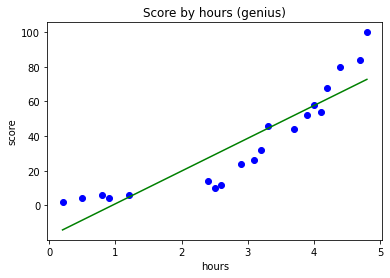

In [ ]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show()

In [ ]:
reg.score(X, y) # 전체 데이터를 통한 모델평가

0.8169296513411765

# 03-2. 다항 회귀 (Polynomial Regression)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x 가 3이라면 [1, 3, 9] 이런 식으로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [ ]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [ ]:
poly_reg.get_feature_names_out() # 확인

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환한 X_poly와 y를 가지고 모델 생성(학습)

LinearRegression()

## 데이터 시각화 (변환된 X와 y)

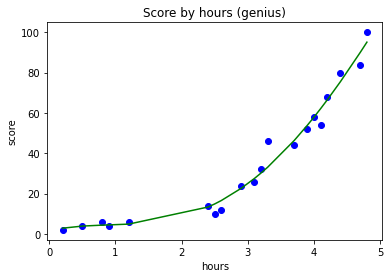

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green') # 중요
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터를 생성 ->그래프 곡선 부드럽게
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [ ]:
X_range.shape

(46,)

In [ ]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [ ]:
X.shape

(20, 1)

In [ ]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개
X_range.shape

(46, 1)

In [ ]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

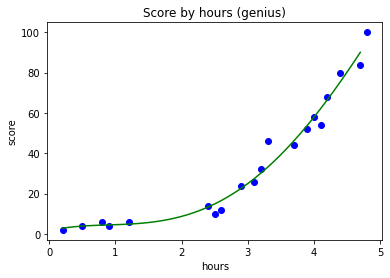

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

## 공부시간에 따른 시험 성적 예측

In [ ]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [ ]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [ ]:
lin_reg.score(X_poly, y) # 단순선형보다는 높은 score

0.9782775579000046